In [1]:
import networkx as nx
import metis
G = metis.example_networkx()
(edgecuts, parts) = metis.part_graph(G, 3)
colors = ['red','blue','green']
for i, p in enumerate(parts):
     G.node[i]['color'] = colors[p]

In [2]:
G.node

{0: {'color': 'red'},
 1: {'color': 'red'},
 2: {'color': 'red'},
 3: {'color': 'red'},
 4: {'color': 'red'},
 5: {'color': 'red'},
 6: {'color': 'blue'},
 7: {'color': 'green'},
 8: {'color': 'green'},
 9: {'color': 'green'},
 10: {'color': 'green'},
 11: {'color': 'green'},
 12: {'color': 'green'},
 13: {'color': 'blue'},
 14: {'color': 'blue'},
 15: {'color': 'blue'},
 16: {'color': 'blue'},
 17: {'color': 'blue'},
 18: {'color': 'blue'}}

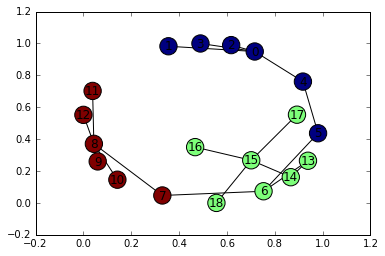

In [3]:
%matplotlib inline
nx.draw_networkx(G, node_color=parts)
#(G, 'example.dot') # Requires pydot or pygraphviz

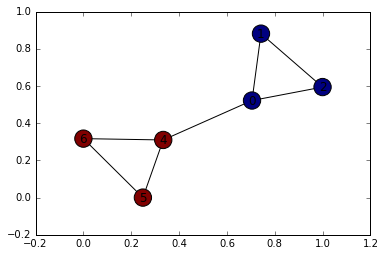

In [4]:
g2 = nx.Graph([(0,1), (0,2), (1,2), (0,4), (4,5), (4,6), (5,6)])
p2 = metis.part_graph(g2,2)
nx.draw_networkx(g2, node_color=p2[1])

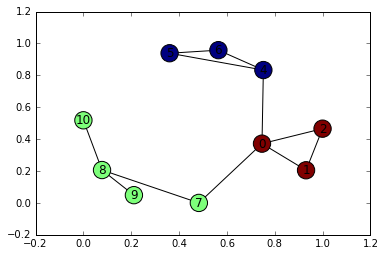

In [5]:
g3 = nx.Graph([(0,1), (0,2), (1,2), (0,4), 
               (4,5), (4,6), (5,6),
               (0, 7), (7, 8), (8,9), (8, 10)])
nx.draw_networkx(g3, node_color=metis.part_graph(g3,3)[1])

In [6]:
import numpy as np
import random

def gen_random_sparse(edges=100,
                      vertices=10,
                      seed=1234):
    
    random.seed(seed)
    
    a = np.random.randint(0, edges, vertices*edges)
    b = np.random.randint(0, edges, vertices*edges)
    
    return (a,b)

def gen_random_graph(edges=100,
                     vertices=10,
                     seed=1234):
    
    (a,b) = gen_random_sparse(edges, vertices, seed)
    
    g = nx.Graph(zip(a,b))
    
    return g

58


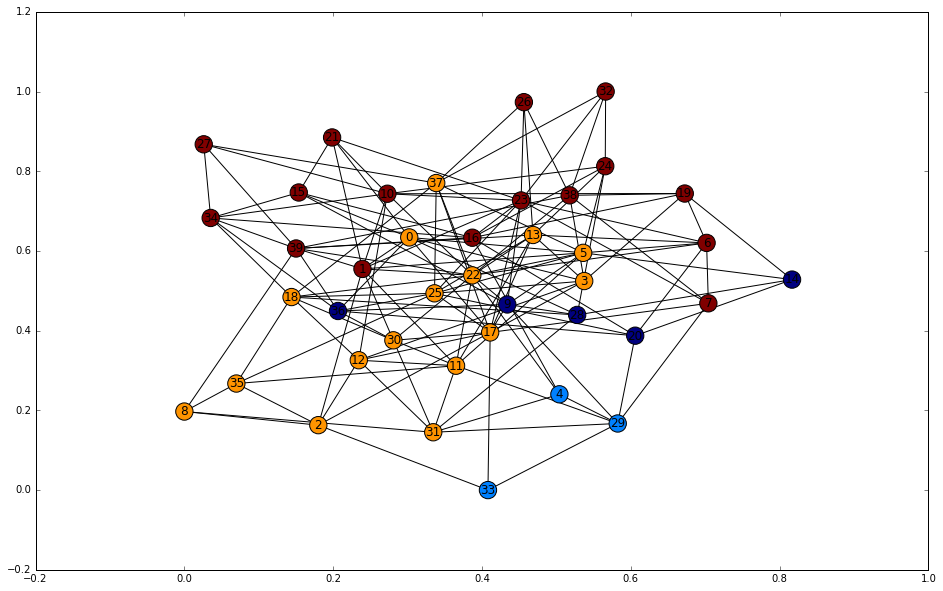

In [7]:
g = gen_random_graph(edges=40, vertices=4)

import pylab
pylab.rcParams['figure.figsize'] = (16.0, 10.0)

(c,p) = metis.part_graph(g, 5, objtype='cut', ufactor=1000, contig=True, niter=20)

print(c)

nx.draw_networkx(g, node_color=p)

In [8]:
for i in range(10, 15):
    print(2**i)
    g = gen_random_graph(edges=2**i, vertices=20)
    %time metis.part_graph(g, int(2**i/10))

1024
CPU times: user 160 ms, sys: 4 ms, total: 164 ms
Wall time: 163 ms
2048
CPU times: user 336 ms, sys: 4 ms, total: 340 ms
Wall time: 343 ms
4096
CPU times: user 776 ms, sys: 4 ms, total: 780 ms
Wall time: 784 ms
8192
CPU times: user 1.66 s, sys: 24 ms, total: 1.68 s
Wall time: 1.68 s
16384
CPU times: user 3.68 s, sys: 28 ms, total: 3.71 s
Wall time: 3.71 s


In [9]:
# %time g_big = gen_random_graph(edges=2**20, vertices=40)

# %time (cuts, parts) = metis.part_graph(g_big, int(2**20/30))

In [10]:
import memory_profiler
%load_ext memory_profiler

n = 2**15

%time %memit gb = gen_random_graph(edges=n, vertices=30)

peak memory: 709.80 MiB, increment: 396.48 MiB
CPU times: user 3.21 s, sys: 140 ms, total: 3.35 s
Wall time: 3.46 s


In [11]:
gb.graph['node_weight_attr'] = 'weight'
for i in range(n): 
    gb.node[i]['weight'] = 1

In [12]:
%time (cuts, parts) = metis.part_graph(gb, int(n/4), iptype='random', ufactor=30000)

print (cuts, np.max(parts), int(n/20))

CPU times: user 9.94 s, sys: 136 ms, total: 10.1 s
Wall time: 10.1 s
912103 8191 1638


In [13]:
import pandas as pd

df = pd.DataFrame({'part': parts})
print(np.unique(parts))
gp = df.part.value_counts()
gp.describe()

[4002 4003 4005 4015 4023 4024 4025 4026 4027 4028 4030 4031 4071 4075 4078
 4079 4081 4087 4090 4095 6055 6063 6076 6095 6102 6113 6116 6117 6119 6122
 6123 6125 6127 6128 6131 6133 6135 6137 6138 6139 6141 6142 7031 7037 7087
 7115 7125 7133 7138 7139 7140 7141 7142 7143 7145 7146 7147 7148 7150 7151
 7152 7154 7155 7156 7159 7162 7163 7165 7166 7167 7567 7575 7591 7619 7623
 7626 7630 7639 7644 7646 7651 7662 7663 7664 7666 7667 7668 7669 7670 7671
 7674 7675 7676 7677 7678 7679 7755 7787 7842 7847 7862 7873 7878 7881 7887
 7891 7895 7902 7903 7905 7906 7907 7909 7910 7911 7914 7915 7916 7917 7918
 7919 7920 7921 7922 7923 7927 7928 7929 7930 7931 7932 7933 7934 7943 7951
 7967 7997 7999 8001 8003 8004 8007 8009 8011 8014 8018 8019 8022 8025 8027
 8029 8031 8035 8038 8039 8042 8043 8044 8047 8048 8051 8052 8053 8054 8056
 8057 8059 8061 8062 8063 8069 8081 8082 8083 8087 8096 8097 8098 8099 8101
 8102 8103 8104 8105 8106 8107 8108 8109 8110 8111 8112 8113 8114 8115 8116
 8117 8118 8

count    269.000000
mean     121.814126
std        1.598397
min      116.000000
25%      121.000000
50%      122.000000
75%      123.000000
max      124.000000
Name: part, dtype: float64

In [14]:
n = 10000
nadj = 20
adj = [tuple(i + np.random.randint(1, nadj, nadj)) for i in range(n-nadj)] + list([()] * nadj)
len(adj)

10000

%time (cuts, parts) = metis.part_graph(adj, int(n/20), iptype='random', ufactor=10000)
print(cuts, len(parts), len(np.unique(parts)))

x = np.zeros(10)
tuple(x)